# PCE与P2刻蚀宽度的交互

原始数据: 287 条
过滤后数据 (P2宽度 < 2000μm): 161 条


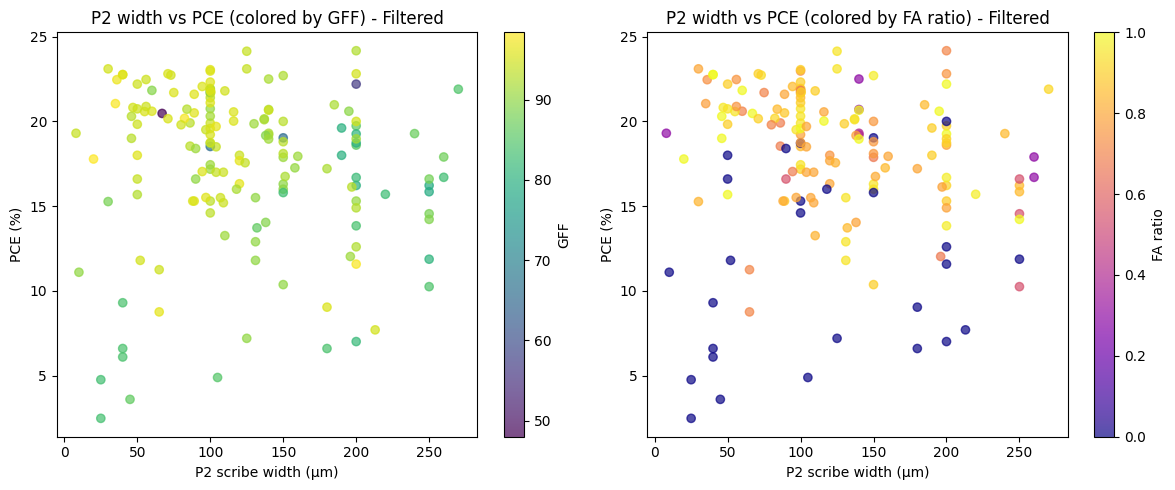

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_excel(r"FinalData.xlsx")

# --- 关键修改：创建过滤后的副本，保留原始df ---
df_filtered = df[(df['P2Width(μm)'] > 0) & (df['P2Width(μm)'] < 300)].copy() # 使用.copy()确保独立副本
# 可选：查看过滤前后的数据量对比
print(f"原始数据: {len(df)} 条")
print(f"过滤后数据 (P2宽度 < 2000μm): {len(df_filtered)} 条")

# 绘制第一个图：P2宽度 vs PCE，颜色表示GFF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# 注意：后续绘图全部使用 df_filtered
sc1 = plt.scatter(df_filtered['P2Width(μm)'], df_filtered['PCE'], c=df_filtered['GFF'], cmap='viridis', alpha=0.7)
plt.colorbar(sc1, label='GFF')
plt.xlabel('P2 scribe width (μm)')
plt.ylabel('PCE (%)')
plt.title('P2 width vs PCE (colored by GFF) - Filtered')

# 绘制第二个图：P2宽度 vs PCE，颜色表示FA比例
plt.subplot(1, 2, 2)
sc2 = plt.scatter(df_filtered['P2Width(μm)'], df_filtered['PCE'], c=df_filtered['FA'], cmap='plasma', alpha=0.7)
plt.colorbar(sc2, label='FA ratio')
plt.xlabel('P2 scribe width (μm)')
plt.ylabel('PCE (%)')
plt.title('P2 width vs PCE (colored by FA ratio) - Filtered')

plt.tight_layout()
plt.show()

原始数据量: 287 条
过滤后数据量 (P2宽度 < 300μm): 161 条
已过滤掉: 126 条数据

筛选后的数据已保存到: P2Total.xlsx
保存的列包括: P2Width(μm), PCE, GFF, FA


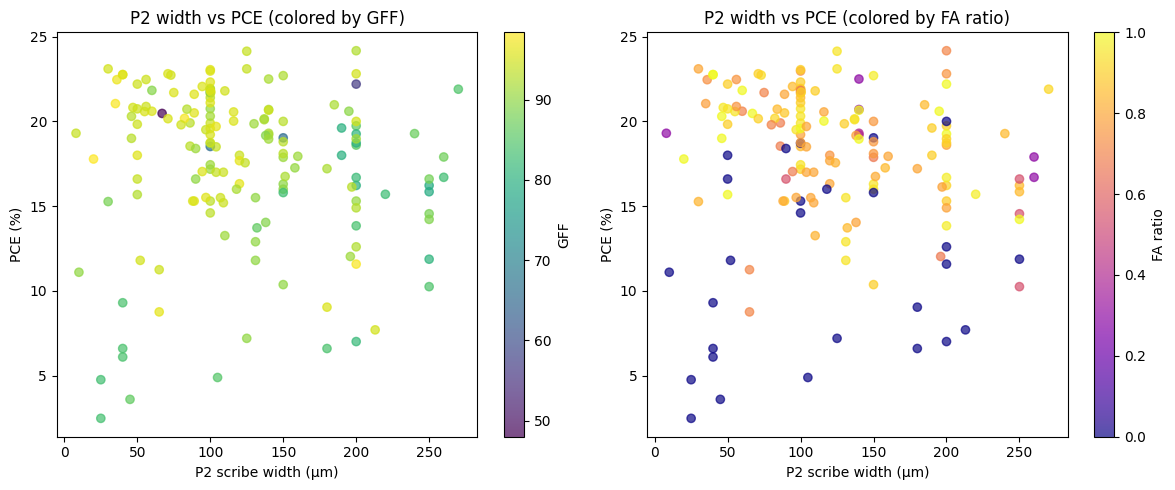

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_excel(r"FinalData.xlsx")

# --- 关键修改1：复合条件过滤 ---
# 保留 300 < P2宽度 < 2000 的数据
df_filtered = df[(df['P2Width(μm)'] > 0) & (df['P2Width(μm)'] < 300)].copy()

# 查看过滤效果
print(f"原始数据量: {len(df)} 条")
print(f"过滤后数据量 (P2宽度 < 300μm): {len(df_filtered)} 条")
print(f"已过滤掉: {len(df) - len(df_filtered)} 条数据")

# --- 关键修改2：保存筛选后的指定列到新Excel文件 ---
# 选择需要保存的列
columns_to_save = ['P2Width(μm)', 'PCE', 'GFF', 'FA']
df_to_save = df_filtered[columns_to_save]

# 保存到新文件，不保存行索引（index=False）
output_filename = 'P2Total.xlsx'
df_to_save.to_excel(output_filename, index=False)
print(f"\n筛选后的数据已保存到: {output_filename}")
print(f"保存的列包括: {', '.join(columns_to_save)}")

# --- 后续绘图部分（使用df_filtered） ---
plt.figure(figsize=(12, 5))

# 子图1：颜色表示GFF
plt.subplot(1, 2, 1)
sc1 = plt.scatter(df_filtered['P2Width(μm)'], df_filtered['PCE'], c=df_filtered['GFF'], cmap='viridis', alpha=0.7)
plt.colorbar(sc1, label='GFF')
plt.xlabel('P2 scribe width (μm)')
plt.ylabel('PCE (%)')
plt.title('P2 width vs PCE (colored by GFF)')

# 子图2：颜色表示FA比例
plt.subplot(1, 2, 2)
sc2 = plt.scatter(df_filtered['P2Width(μm)'], df_filtered['PCE'], c=df_filtered['FA'], cmap='plasma', alpha=0.7)
plt.colorbar(sc2, label='FA ratio')
plt.xlabel('P2 scribe width (μm)')
plt.ylabel('PCE (%)')
plt.title('P2 width vs PCE (colored by FA ratio)')

plt.tight_layout()
plt.show()